In [1]:
# Import Dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#  We'll add the code that generates the latitudes and longitudes, but first, they need to be stored so that 
#  we can access them later. Since we are creating arrays of latitudes and longitudes, we'll declare each 
#  array as a variable.

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.  The logical operator "not in" is added to
    # determine whether the found city is already in the cities list.  If it isnt it will be added in "append"
    # function line.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

652

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in out list.
for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count = 1
        record_count = 1
        #time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
# We create the for loop with the enumerate() method and reference
# the index and the city in the list.
for i, city in enumerate(cities):

    #In the conditional statement, we check if the remainder of the
    # index divided by 50 is equal to 0 and if the index is greater
    # than or equal to 50. If the statement is true, then the 
    # set_count and the record_count are incremented by 1.
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        #time.sleep(60)
    # Inside the conditional statement, we create the URL endpoint 
    # for each city, as before. However, we are removing the blank 
    # spaces in the city name and concatenating the city name with,
    # city.replace(" ","+"). This will find the corresponding 
    # weather data for the city instead of finding the weather data 
    # for the first part of the city name.
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # we add a print statement that tells us the record count and 
    # set count, and the city that is being processed.
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count, before next city.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | port blair
Processing Record 2 of Set 1 | male
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | ahipara
Processing Record 5 of Set 1 | san policarpo
Processing Record 6 of Set 1 | rungata
City not found. Skipping...
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | katsuura
Processing Record 9 of Set 1 | aksay
Processing Record 10 of Set 1 | nanning
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | arraial do cabo
Processing Record 22 of Set 1 | taoudenni
Processing Record 23 of Set 1 | port alfred
Processing Record 24 of S

Processing Record 43 of Set 4 | vao
Processing Record 44 of Set 4 | tigil
Processing Record 45 of Set 4 | camargo
Processing Record 46 of Set 4 | isangel
Processing Record 47 of Set 4 | east london
Processing Record 48 of Set 4 | victoria
Processing Record 49 of Set 4 | gushikawa
Processing Record 50 of Set 4 | clyde river
Processing Record 1 of Set 5 | talnakh
Processing Record 2 of Set 5 | alice springs
Processing Record 3 of Set 5 | ancud
Processing Record 4 of Set 5 | kremenki
Processing Record 5 of Set 5 | aripuana
Processing Record 6 of Set 5 | geraldton
Processing Record 7 of Set 5 | melfi
Processing Record 8 of Set 5 | aromashevo
Processing Record 9 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 10 of Set 5 | toftir
City not found. Skipping...
Processing Record 11 of Set 5 | changping
Processing Record 12 of Set 5 | amravati
Processing Record 13 of Set 5 | taltal
Processing Record 14 of Set 5 | pangnirtung
Processing Record 15 of Set 5 | chongwe
Processing

Processing Record 32 of Set 8 | lolua
City not found. Skipping...
Processing Record 33 of Set 8 | salalah
Processing Record 34 of Set 8 | deputatskiy
Processing Record 35 of Set 8 | dodge city
Processing Record 36 of Set 8 | ust-maya
Processing Record 37 of Set 8 | zakamensk
Processing Record 38 of Set 8 | stulovo
Processing Record 39 of Set 8 | piranshahr
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | zyryanskoye
Processing Record 42 of Set 8 | bethel
Processing Record 43 of Set 8 | sao jose da coroa grande
Processing Record 44 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 45 of Set 8 | itoman
Processing Record 46 of Set 8 | diego de almagro
Processing Record 47 of Set 8 | auki
Processing Record 48 of Set 8 | pachora
Processing Record 49 of Set 8 | kavali
Processing Record 50 of Set 8 | umm lajj
Processing Record 1 of Set 9 | lazaro cardenas
Processing Record 2 of Set 9 | chikwawa
Processing Record 3 of Set 9 | torbat-e jam
Processin

Processing Record 21 of Set 12 | ilulissat
Processing Record 22 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 23 of Set 12 | durban
Processing Record 24 of Set 12 | aksu
Processing Record 25 of Set 12 | san carlos del zulia
Processing Record 26 of Set 12 | tazovskiy
Processing Record 27 of Set 12 | tagusao
Processing Record 28 of Set 12 | camopi
Processing Record 29 of Set 12 | margate
Processing Record 30 of Set 12 | shambu
Processing Record 31 of Set 12 | sorvag
City not found. Skipping...
Processing Record 32 of Set 12 | sao gabriel da cachoeira
Processing Record 33 of Set 12 | pisco
Processing Record 34 of Set 12 | yar-sale
Processing Record 35 of Set 12 | tres lagoas
Processing Record 36 of Set 12 | tiznit
Processing Record 37 of Set 12 | sabang
Processing Record 38 of Set 12 | skagastrond
City not found. Skipping...
Processing Record 39 of Set 12 | yakeshi
Processing Record 40 of Set 12 | qiqihar
Processing Record 41 of Set 12 | prince rupert
Processing Rec

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Blair,11.6667,92.7500,80.64,74,40,9.22,IN,2022-02-03 03:51:15
1,Male,4.1748,73.5089,84.15,74,75,16.11,MV,2022-02-03 03:51:15
2,Hermanus,-34.4187,19.2345,65.89,81,0,14.25,ZA,2022-02-03 03:48:49
3,Ahipara,-35.1667,173.1667,74.97,66,92,13.35,NZ,2022-02-03 03:51:15
4,San Policarpo,12.1791,125.5072,81.30,81,85,12.55,PH,2022-02-03 03:51:16
5,Lebu,-37.6167,-73.6500,58.17,95,66,8.10,CL,2022-02-03 03:46:18
6,Katsuura,35.1333,140.3000,50.04,44,100,3.24,JP,2022-02-03 03:51:16
7,Aksay,47.2600,39.8700,45.25,88,100,11.99,RU,2022-02-03 03:51:16
8,Nanning,22.8167,108.3167,50.45,66,100,5.77,CN,2022-02-03 03:51:17
9,Yellowknife,62.4560,-114.3525,-29.70,75,40,5.75,CA,2022-02-03 03:46:28


In [12]:

# Reorder the columns in the order you want them to appear.    
new_column_order =["City", "Country", "Date", "Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Blair,IN,2022-02-03 03:51:15,11.6667,92.7500,80.64,74,40,9.22
1,Male,MV,2022-02-03 03:51:15,4.1748,73.5089,84.15,74,75,16.11
2,Hermanus,ZA,2022-02-03 03:48:49,-34.4187,19.2345,65.89,81,0,14.25
3,Ahipara,NZ,2022-02-03 03:51:15,-35.1667,173.1667,74.97,66,92,13.35
4,San Policarpo,PH,2022-02-03 03:51:16,12.1791,125.5072,81.30,81,85,12.55
...,...,...,...,...,...,...,...,...,...
595,Ulkan,RU,2022-02-03 03:54:29,57.2430,107.3223,7.20,92,96,2.35
596,Yerkoy,TR,2022-02-03 03:54:29,39.6381,34.4672,29.16,90,100,4.34
597,Gamba,GA,2022-02-03 03:54:30,-2.6500,10.0000,76.26,86,100,4.09
598,Nanortalik,GL,2022-02-03 03:54:30,60.1432,-45.2371,18.99,79,100,11.97


In [13]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

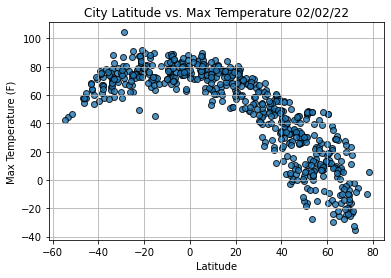

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

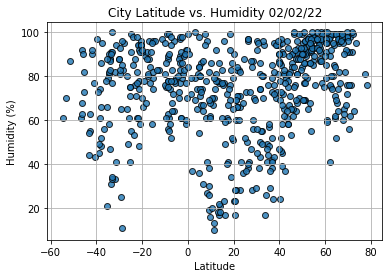

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

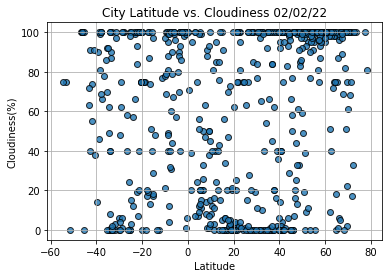

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

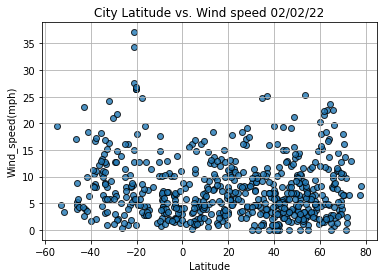

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind speed "+ time.strftime("%x"))
plt.ylabel("Wind_speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()